# Detect MNIST numbers Using Keras and PlaidML

In [1]:
import os
import time
import numpy as np
from matplotlib import pyplot as plt

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend" # Using PlaidML Backend

import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using plaidml.keras.backend backend.


## 1) Prepare the data
ทำการโหลด Data MNIST จากเว็บไซต์
http://yann.lecun.com/exdb/mnist/ มาไว้ที่ Folder เดียวกันกับ Notebook และทำการแตก gzip

In [7]:
image_size = 28
num_images = 60000

with open('./data/mnist/train-images-idx3-ubyte', 'rb') as fp:
    fp.read(16)
    buf = fp.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    x_train = data.reshape(num_images, image_size, image_size, 1)
    
with open('./data/mnist/train-labels-idx1-ubyte', 'rb') as fp:
    fp.read(8)
    buf = fp.read(num_images)
    y_train = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    
num_images = 10000
    
with open('./data/mnist/t10k-images-idx3-ubyte', 'rb') as fp:
    fp.read(16)
    buf = fp.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    x_test = data.reshape(num_images, image_size, image_size, 1)
    
with open('./data/mnist/t10k-labels-idx1-ubyte', 'rb') as fp:
    fp.read(8)
    buf = fp.read(num_images)
    y_test = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

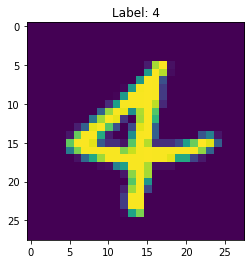

In [4]:
n = 150
plt.title(f'Label: {y_train[n]}')
plt.imshow(x_train[n].squeeze())

## 2) Train the model

In [8]:
batch_size = 128
num_classes = 10
epochs = 20

img_rows, img_cols = image_size, image_size

# Reshape the image 
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)  

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# our model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.2619 - acc: 0.9199 - val_loss: 0.0571 - val_acc: 0.9817
Epoch 2/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0910 - acc: 0.9731 - val_loss: 0.0431 - val_acc: 0.9852
Epoch 3/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0670 - acc: 0.9800 - val_loss: 0.0364 - val_acc: 0.9870
Epoch 4/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0529 - acc: 0.9839 - val_loss: 0.0332 - val_acc: 0.9894
Epoch 5/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0481 - acc: 0.9852 - val_loss: 0.0364 - val_acc: 0.9887
Epoch 6/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0419 - acc: 0.9873 - val_loss: 0.0295 - val_acc: 0.9905
Epoch 7/20
60000/60000 [===================

## 3) Predict an image

In [9]:
np.argmax(model.predict(x_test[6].reshape(1, 28, 28, 1)))

4

## 4) Save the model for later usage

In [10]:
model.save('mnist_cnn.h5')